In [1]:
# To get multiple outputs from one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
from IPython.display import HTML, Markdown, Image
# for presentations:
#display(HTML("<style>.container { width:100% !important; }</style>"))

import sys
from pathlib import Path

def sys_info():
    frmt = '\nPython ver: {}\nPython env: {}\n'
    frmt += 'OS:         {}\nCurrent dir: {}\n'
    print(frmt.format(sys.version, 
                      Path(sys.prefix).name,
                      sys.platform,
                      Path.cwd()))


def add_to_sys_path(this_path, up=False):
    """
    Prepend this_path to sys.path.
    If up=True, path refers to parent folder (1 level up).
    """
    newp = Path(this_path).as_posix() # no str method (?)
    if up:
        newp = Path(this_path).parent.as_posix()

    msg = F'Path already in sys.path: {newp}'
    if newp not in sys.path:
        sys.path.insert(1, newp)
        msg = F'Path added to sys.path: {newp}'
    print(msg)

# if notebook inside another folder, eg ./notebooks:
nb_folder = 'notebooks'
add_to_sys_path(Path.cwd(), Path.cwd().name.startswith(nb_folder))


# Filtered dir() for method discovery:
def filter_dir(mdl, filter_str=None, start_with_str='_', exclude=True):
    """Filter dir(mdl) for method discovery.
       Input:
       :param mdl (object): module, optionally with submodule path(s), e.g. mdl.submdl1.submdl2.
       :param filter_str (str, None): filter all method names containing that string.
       :param start_with_str (str, '_'), exclude (bool, True): start_with_str and exclude work 
              together to perform search on non-dunder methods (default).
    """
    search_dir = [d for d in dir(mdl) if not d.startswith(start_with_str) == exclude]
    if filter_str is None:
        return search_dir
    else:
        filter_str = filter_str.lower()
        return [d for d in search_dir if d.lower().find(filter_str) != -1]


def get_project_dirs(which=['data', 'images'],
                     nb_folder='notebooks',
                     use_parent=True):
    '''Create folder(s) named in `which` at the parent level.'''
    dir_lst = []
    if Path.cwd().name.startswith(nb_folder) or use_parent:
        dir_fn = Path.cwd().parent.joinpath
    else:
        dir_fn = Path.cwd().joinpath
        
    for d in which:
        DIR = dir_fn(d)
        if not DIR.exists():
            Path.mkdir(DIR)
        dir_lst.append(DIR)
    return dir_lst

DIR_DATA, DIR_IMG = get_project_dirs()
    
import numpy as np
import scipy as sp
from scipy import stats as sps
import pandas as pd
#pd.set_option("display.max_colwidth", 200)

import matplotlib as mpl
from matplotlib import pyplot as plt
plt.ion()
plt.style.use('seaborn-muted')

from pprint import pprint as pp


def add_div(div_class='info', div_start='Tip:', 
            div_text='Some tip here', output_string=True):
    """
    Behaviour with default `output_string=True`:
    The cell is overwritten with the output, but the cell mode is still 'code',
    not 'markdown'.
    Workaround: After running the function, click on the new cell, press ESC, 
                type 'm', then run the new cell.
    If `output_string=False`, the output is displayed in an new cell with the 
    code cell visible.
    ```
    [x]
    add_div('alert-warning', 'Tip: ', 'some tip here', output_string=True)
    [x]
    <div class="alert alert-warning"><b>Tip: </b>some tip here</div>
    ```
    """
    accepted = ['info', 'warning', 'danger']
    div_class = div_class.lower()
    if div_class not in accepted:
        msg = f'<div class="alert"><b>Wrong class:&nbsp;</b> `div_start` not in: {accepted}.</div>'
        return Markdown(msg)
    
    div = f"""<div class="alert alert-{div_class}"><b>{div_start}&nbsp;&nbsp;</b>{div_text}</div>"""
    if output_string:
        return get_ipython().set_next_input(div, 'markdown')
    else:
        return Markdown(div)

    
def new_section(title='New section'):
    style = "text-align:center;background:#c2d3ef;padding:16px;color:#ffffff;font-size:2em;width:98%"
    div = f'<div style="{style}">{title}</div>'
    #return HTML('<div style="{}">{}</div>'.format(style, title))
    return get_ipython().set_next_input(div, 'markdown')


def show_versions():
    txt = '<pre><br>'
    txt += F'Python:\t\t{sys.version}<br>'
    txt += F'Python env:\t{Path(sys.prefix).name}<br>'
    txt += F'Numpy:\t\t{np.__version__}<br>'
    txt += F'Scipy:\t\t{sp.__version__}<br>'
    txt += F'Pandas:\t\t{pd.__version__}<br>'
    txt += F'Matplotlib:\t{mpl.__version__}<br>'
    txt += F'Currrent dir: {Path.cwd()}'
    txt += '</pre>'
    div = f"""<div class="alert alert-info"><b>Versions:</b><br>{txt}</div>"""
    return HTML(div)


# autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    get_ipython().run_line_magic('load_ext', 'autoreload')

%autoreload 2

#..................
sys_info()

no_wmark = False
try:
    %load_ext watermark
    %watermark
except ModuleNotFoundError:
    no_wmark = True

if no_wmark:
    show_versions()
else:
    %watermark -iv

Path added to sys.path: C:/Users/catch/Documents/GitHub/Bioinformatics/Rosalind

Python ver: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Python env: ds37
OS:         win32
Current dir: C:\Users\catch\Documents\GitHub\Bioinformatics\Rosalind\notebooks

Last updated: 2021-06-07T16:14:33.305722-04:00

Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.21.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit

numpy     : 1.19.2
matplotlib: 3.3.4
scipy     : 1.6.2
pandas    : 1.2.3
sys       : 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]



# Rosalind project exercises
---

# Rubrics in stronghold.py:

---
# DONE:
 - [x] DNA: Counting DNA Nucleotides  
 - [x] RNA: Transcribing DNA into RNA 
 - [x] REVC: Complementing a Strand of DNA  
 - [x] FIB: Rabbits and Recurrence Relations: Wascally Wabbits    
 - [x] GC: Computing GC Content 
 - [x] HAMM: Counting Point Mutations  
 - [x] IPRB: Mendel's First Law  
 - [x] PROT: Translating RNA into Protein 
 - [x] SUBS: Finding a motif in DNA
 - [x] CONS: Consensus and Profile 
 - [x] FIBD: Mortal Fibonacci Rabiits
 - [x] GRPH: A Brief Introduction to Graph Theory 
 - [ ] IEV: Calculating Expected Offspring
---

## TO DO:

---
# TO DO:
 
 # Rubrics to implement:  
 - [] LCSM:  
 - [] LIA:  
 - [] MPRT:  
 - [] MRNA:  
 - [] ORF:  
 - [] PERM:  
 - [] PRTM:  
 - [] REVP:  
 - [] SPLC:  
 - [] LEXF:  
 - [] LGIS:  
 - [] LONG:  
 - [] PMCH:  
 - [] PPER:  
 - [] PROB:  
 - [] SIGN:  
 - [] SSEQ:  
 - [] TRAN:  
 - [] TREE:  
 - [] CAT:  
 - [] CORR:  
 - [] INOD:  
 - [] KMER:  
 - [] KMP:  
 - [] LCSQ:  
 - [] LEXV:  
 - [] MMCH:  
 - [] PDST:  
 - [] REAR:  
 - [] RSTR:  
 - [] SSET:  
 - [] ASPC:  
 - [] EDIT:  
 - [] EVAL:  
 - [] MOTZ:  
 - [] NWCK:  
 - [] SCSP:  
 - [] SETO:  
 - [] SORT:  
 - [] SPEC:  
 - [] TRIE:  
 - [] CONV:  
 - [] CTBL:  
 - [] DBRU:  
 - [] EDTA:  
 - [] FULL:  
 - [] INDC:  
 - [] ITWV:  
 - [] LREP:  
 - [] NKEW:  
 - [] RNAS:  
 - [] AFRQ:  
 - [] CSTR:  
 - [] CTEA:  
 - [] CUNR:  
 - [] GLOB:  
 - [] PCOV:  
 - [] PRSM:  
 - [] QRT:  
 - [] SGRA:  
 - [] SUFF:  
 - [] CHBP:  
 - [] CNTQ:  
 - [] EUBT:  
 - [] GASM:  
 - [] GCON:  
 - [] LING:  
 - [] LOCA:  
 - [] MEND:  
 - [] MGAP:  
 - [] MREP:  
 - [] MULT:  
 - [] PDPL:  
 - [] ROOT:  
 - [] SEXL:  
 - [] SPTD:  
 - [] WFMD:  
 - [] ALPH:  
 - [] ASMQ:  
 - [] CSET:  
 - [] EBIN:  
 - [] FOUN:  
 - [] GAFF:  
 - [] GREP:  
 - [] OAP:  
 - [] QRTD:  
 - [] SIMS:  
 - [] SMGB:  
 - [] KSIM:  
 - [] LAFF:  
 - [] OSYM:  
 - [] RSUB: 

---

---
---

In [2]:
# Reset DIR_DATA to local data folder:
DIR_DATA, DIR_IMG = get_project_dirs(use_parent=False)
DIR_DATA

WindowsPath('C:/Users/catch/Documents/GitHub/Bioinformatics/Rosalind/data')

In [54]:
from collections import defaultdict, Counter
from itertools import product

from rosacode import stronghold as sh

---
---
# DNA :: Counting DNA Nucleotides
* Problem: http://rosalind.info/problems/dna/

A string is simply an ordered collection of symbols selected from some 
alphabet and formed into a word; the length of a string is the number 
of symbols that it contains.

An example of a length 21 DNA string (whose alphabet contains the 
symbols 'A', 'C', 'G', and 'T') is "ATGCTTCAGAAAGGTCTTACG."

* Given: 
A DNA string s of length at most 1000 nt.

* Return: 
Four integers (separated by spaces) counting the respective 
number of times that the symbols 'A', 'C', 'G', and 'T' occur in s.

* Sample Dataset
```
AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC
```
* Sample Output
```
20 12 17 21
```

In [37]:
# %load -n sh.words_freq_from_file
def words_freq_from_file(fname=None, char_max=1000):
    with open(fname) as fh:
        line = fh.readline()[:char_max]
            
    cnt = Counter(line)
    print(cnt['A'], cnt['C'], cnt['G'], cnt['T'])
    return

In [25]:
dna_file = DIR_DATA.joinpath('rosalind_dna.txt')
sh.words_freq_from_file(dna_file)

234 243 251 233


---
---
# RNA :: Transcribing DNA into RNA

* Problem: http://rosalind.info/problems/rna/

An RNA string is a string formed from the alphabet containing 'A', 'C', 'G', and 'U'.   
Given a DNA string t corresponding to a coding strand, its transcribed RNA string u is formed by replacing all occurrences of 'T' in t with 'U' in u.

* Given: A DNA string t having length at most 1000 nt.
* Return: The transcribed RNA string of t.

* Sample Dataset:
```
GATGGAACTTGACTACGTAAATT
```
* Sample Output: 
```
GAUGGAACUUGACUACGUAAAUU
```

In [32]:
# %load -n sh.rna_from_dna_file
def rna_from_dna_file(fname=None, char_max=1000):
    with open(fname) as fh:
        t = fh.readline().strip()[:char_max]
    return t.replace('T', 'U')


In [37]:
rna_file = DIR_DATA.joinpath('rosalind_rna.txt')

sh.rna_from_dna_file(rna_file)

'AAUGAAGUGGUAUCUUGGAACGGGGUGUGGGGGAGGAUCGCGAAGGAUAAUCCAAUUUUAUGCAGACCGGGGAGGCACCCUUCCCUGUGCGAAAACUCUGGCGAUUGGGUUCGUGGAAACACUUGAACACAAGACAAACAUAUGGAGGGCGAAGGAUUUAUAGCAGGUCCCAAAUGAAUACGUCCUAUAAAGGAGUGGGCGAAAUAAAUGUACUUUUCUAUUAUAGUCACCGCACAGGUGAGUGUAUAAUUACAUCUACUUGUGCAGUGCUAAGUCGUGGGUACGUUAGCACACUAACACAAGCAAAAUACGUCACUUCACCAGUCUCCGGAAUCGCUCGAUGUGAUUACAGUGCGCUAGCGUGUAACUCAGGAUAACUUGUAAAAAGGCUUUCUGGCCUUCGCCCAUCAGGAGUUAGGUAGUGGAGGCAGAAGACACUCCCGCGUACAGAAGCGUCCGCUCCUGGACCGGGACUGGGAACAACAGCCGCAGGGGUGGCUAUCAAAAGUGUCGAACGGUUCCUGGGAUAAUUUUGUGUCGGACCGUUCGGCCAUCGUCAGGGUAUUUCUCGUUGUAUCCUAUGUCUUUUCAUCACGUUGGGCUUUACAUUCACGGAUGAGGGGGCAAUCGCUCAGUCAGUCGCACGAGAGUUUGAAUGAGCUAAGGCCACGUAGAGCACGGAAUACACACCGGAUUUCCUUACCUAUGGAAAAGAUUCUUGCGAGGGAAAUCAUCACAAACGUGAGAUCGCCUUGCCCCAGAGCGAAAUAAUGGUGACUCCCGAGCCAUUCAUUGACUAUUUGAGUGCGCUGCGUCCCGCCUAUAAAAACACAUCACUUGUACUUGACGUCUAGGGCAGAAUCCAGGGGUGGGGCUGCGAAUUUUAUAGCGGUCUGCACACAACUUAAUCAGGUCAUACUUGUUUCCUGUGCGGCGUUCAGGAAGUCUCUGGUUGGAGCUG'

---
---
# REVC:: Complementing a Strand of DNA 

* Problem: http://rosalind.info/problems/revc/   

In DNA strings, symbols 'A' and 'T' are complements of each other,  as are 'C' and 'G'.   
The reverse complement of a DNA string s is the string sc formed by reversing the symbols of s, then taking the complement of each 
symbol (e.g., the reverse complement of "GTCA" is "TGAC").

* Given: A DNA string s of length at most 1000 bp.
* Return: The reverse complement sc of s.

* Sample Dataset  
```
AAAACCCGGT
```
* Sample Output
```
ACCGGGTTTT
```

In [43]:
# %load -n sh.rev_complement_from_dna_file
def rev_complement_from_dna_file(fname=None, char_max=1000):
    with open(fname) as fh:
        dna = fh.readline().strip()[:char_max]
    d = {'A':'T', 'T':'A', 'C':'G', 'G':'C'}
    print(''.join(d[nt] for nt in dna[::-1]))
    return

In [44]:
revc_file = DIR_DATA.joinpath('rosalind_revc.txt')

sh.rev_complement_from_dna_file(rna_file)

CAGCTCCAACCAGAGACTTCCTGAACGCCGCACAGGAAACAAGTATGACCTGATTAAGTTGTGTGCAGACCGCTATAAAATTCGCAGCCCCACCCCTGGATTCTGCCCTAGACGTCAAGTACAAGTGATGTGTTTTTATAGGCGGGACGCAGCGCACTCAAATAGTCAATGAATGGCTCGGGAGTCACCATTATTTCGCTCTGGGGCAAGGCGATCTCACGTTTGTGATGATTTCCCTCGCAAGAATCTTTTCCATAGGTAAGGAAATCCGGTGTGTATTCCGTGCTCTACGTGGCCTTAGCTCATTCAAACTCTCGTGCGACTGACTGAGCGATTGCCCCCTCATCCGTGAATGTAAAGCCCAACGTGATGAAAAGACATAGGATACAACGAGAAATACCCTGACGATGGCCGAACGGTCCGACACAAAATTATCCCAGGAACCGTTCGACACTTTTGATAGCCACCCCTGCGGCTGTTGTTCCCAGTCCCGGTCCAGGAGCGGACGCTTCTGTACGCGGGAGTGTCTTCTGCCTCCACTACCTAACTCCTGATGGGCGAAGGCCAGAAAGCCTTTTTACAAGTTATCCTGAGTTACACGCTAGCGCACTGTAATCACATCGAGCGATTCCGGAGACTGGTGAAGTGACGTATTTTGCTTGTGTTAGTGTGCTAACGTACCCACGACTTAGCACTGCACAAGTAGATGTAATTATACACTCACCTGTGCGGTGACTATAATAGAAAAGTACATTTATTTCGCCCACTCCTTTATAGGACGTATTCATTTGGGACCTGCTATAAATCCTTCGCCCTCCATATGTTTGTCTTGTGTTCAAGTGTTTCCACGAACCCAATCGCCAGAGTTTTCGCACAGGGAAGGGTGCCTCCCCGGTCTGCATAAAATTGGATTATCCTTCGCGATCCTCCCCCACACCCCGTTCCAAGATACCACTTCATT


---
---
# FIB :: Rabbits and Recurrence Relations: Wascally Wabbits

* Problem: http://rosalind.info/problems/fib/   

A recurrence relation is a way of defining the terms of a sequence with respect 
to the values of previous terms. In the case of Fibonacci's rabbits from the 
introduction, any given month will contain the rabbits that were alive the 
previous month, plus any new offspring.   
A key observation is that the number of offspring in any month is equal to 
the number of rabbits that were alive two months prior. As a result, if $F_n$ 
represents the number of rabbit pairs alive after the n-th month, then we obtain 
the Fibonacci sequence having terms $F_n$ that are defined by the recurrence relation:  
$F_n$ = $F_{n−1}$ + $F_{n−2}$ (with F1 = F2 = 1 to initiate the sequence).   

When finding the n-th term of a sequence defined by a recurrence relation, we 
can simply use the recurrence relation to generate terms for progressively larger values of n.   
This problem introduces us to the computational technique of dynamic programming, which successively builds up solutions by using the 
answers to smaller cases.

* Given: Positive integers n ≤ 40 and k ≤ 5. n: months; k: litter size.
* Return:   
The total number of rabbit pairs that will be present after n months, if we begin with 1 pair and in each generation, every pair of reproduction-age 
 rabbits produces a litter of k rabbit pairs (instead of only 1 pair).

* Sample Dataset
```
5 3
```
* Sample Output
```
19
```
```
mon pairs:
1 F1 = 1
2 F2 = 1
3 F1*k=3 + F2 = 4 = F3
4 F2*k=3 + F3 = 3 + 4 = 7 = F4
5 F3*k=3 + F4 = 4*3 + 7 = 12 + 7 = 19
```

In [48]:
# %load -n sh.fib_pairs
def fib_pairs(months, p):
    """
    Return the total number of rabbit pairs that will be present after n months, 
    if we begin with 1 pair and in each generation, every pair of reproduction-age 
    rabbits produces a litter of p rabbit pairs (instead of only 1 pair).
    """
    a = 1
    b = 1
    if (months < 0) | (months > 40) | (p > 5):
        msg = "At least one parameter is invalid:\nmonths, "
        msg += "positive int ≤ 40;  p, # pairs in litter ≤ 5."
        return msg

    if months == 1: 
        return a 
    elif months == 2: 
        return b 
    else:
        for i in range(2, months): #pylint: disable=unused-variable
            a, b = a + b * p, a

        return a


In [49]:
sh.fib_pairs(5, 3)

19

---
---
# GC :: Computing GC Content

* Problem: http://rosalind.info/problems/gc/
        
The GC-content of a DNA string is given by the percentage of symbols
 in the string that are 'C' or 'G'. For example, the GC-content of 
 "AGCTATAG" is 37.5%. Note that the reverse complement of any DNA 
 string has the same GC-content.
DNA strings must be labeled when they are consolidated into a database. 
A commonly used method of string labeling is called FASTA format. In 
this format, the string is introduced by a line that begins with '>', 
followed by some labeling information. Subsequent lines contain the 
string itself; the first line to begin with '>' indicates the label 
of the next string.

In Rosalind's implementation, a string in FASTA format will be labeled 
by the ID "Rosalind_xxxx", where "xxxx" denotes a four-digit code between 
0000 and 9999.

* Given: At most 10 DNA strings in FASTA format (of length at most 1 kbp each).
* Return: The ID of the string having the highest GC-content, followed by the 
GC-content of that string. Rosalind allows for a default error of 0.001 in 
all decimal answers unless otherwise stated; please see the note on absolute 
error below.

* Sample Dataset
```
>Rosalind_6404
CCTGCGGAAGATCGGCACTAGAATAGCCAGAACCGTTTCTCTGAGGCTTCCGGCCTTCCC
TCCCACTAATAATTCTGAGG
>Rosalind_5959
CCATCGGTAGCGCATCCTTAGTCCAATTAAGTCCCTATCCAGGCGCTCCGCCGAAGGTCT
ATATCCATTTGTCAGCAGACACGC
>Rosalind_0808
CCACCCTCGTGGTATGGCTAGGCATTCAGGAACCGGAGAACGCTTCAGACCAGCCCGGAC
TGGGAACCTGCGGGCAGTAGGTGGAAT
```

* Sample Output<br>

```
Rosalind_0808
60.919540
```

In [55]:
# %load -n sh.highest_gc_from_fasta_files
def highest_gc_from_fasta_files(multifasta=os.path.join(os.curdir, 'rosalind_gc.txt')):
    gc = 0
    with open(multifasta) as fh:
        for seqs in SimpleFastaParser(fh):
            newgc = gc_content(seqs[1])
            if newgc > gc:
                gc = newgc
                gcid = seqs[0]
        
    print(F'{gcid}\n{gc}')
    return


In [43]:
gc_file =  DIR_DATA.joinpath('rosalind_gc.txt')
sh.highest_gc_from_fasta_files(gc_file)

Rosalind_3583
51.011236


---
---
# HAMM :: Counting Point Mutations

* Problem: http://rosalind.info/problems/hamm/  

## Evolution as a Sequence of Mistakes

A mutation is simply a mistake that occurs during the creation or copying 
of a nucleic acid, in particular DNA. Because nucleic acids are vital to 
cellular functions, mutations tend to cause a ripple effect throughout the 
cell. Although mutations are technically mistakes, a very rare mutation may 
equip the cell with a beneficial attribute. In fact, the macro effects of 
evolution are attributable by the accumulated result of beneficial microscopic 
mutations over many generations.

The simplest and most common type of nucleic acid mutation is a point mutation, 
which replaces one base with another at a single nucleotide. In the case of DNA, 
a point mutation must change the complementary base accordingly; see Figure 1.

Two DNA strands taken from different organism or species genomes are homologous 
if they share a recent ancestor; thus, counting the number of bases at which 
homologous strands differ provides us with the minimum number of point mutations 
that could have occurred on the evolutionary path between the two strands.

We are interested in minimizing the number of (point) mutations separating two 
species because of the biological principle of parsimony, which demands that 
evolutionary histories should be as simply explained as possible.


* Problem:
Given two strings s and t of equal length, the __Hamming distance__ between 
s and t, denoted dH(s,t), is the number of corresponding symbols that 
differ in s and t. See Figure 2.

* Given: Two DNA strings s and t of equal length (not exceeding 1 kbp).
* Return: The Hamming distance $d_H$(s,t).

* Sample Dataset
```
GAGCCTACTAACGGGAT
CATCGTAATGACGGCCT
```
* Sample Output
```
7
```

In [38]:
# %load -n sh.dH
def dH(s, t):
    assert(len(s)==len(t))
    return sum([a!=b for a,b in zip(s, t)])

In [39]:
sh.dH('GAGCCTACTAACGGGAT', 'CATCGTAATGACGGCCT')

7

---
---
# IPRB :: Mendel's First Law
## Introduction to Mendelian Inheritance

* Problem: http://rosalind.info/problems/iprb/  

<figure style="display:table; text-align:center; width:800px; height:200px;">
  <img src="./images/Punnett_Square.png" 
       alt="x"
       title="Figure 1"
   >
  <figcaption style="color:teal; font-family: sans-serif; display: table-caption; caption-side: bottom;">
       Figure 1. A Punnett square representing the possible outcomes of crossing a heterozygous organism (Yy) with a homozygous 
                 recessive organism (yy); here, the dominant allele Y corresponds to yellow pea pods, and the recessive allele
                 y corresponds to green pea pods.
  </figcaption>
        <p>
</figure>


Modern laws of inheritance were first described by Gregor Mendel 
(an Augustinian Friar) in 1865. The contemporary hereditary model, 
called blending inheritance, stated that an organism must exhibit 
a blend of its parent's traits. This rule is obviously violated both 
empirically (consider the huge number of people who are taller than 
both their parents) and statistically (over time, blended traits would 
simply blend into the average, severely limiting variation).

Mendel, working with thousands of pea plants, believed that rather 
than viewing traits as continuous processes, they should instead be 
divided into discrete building blocks called factors. Furthermore, 
he proposed that every factor possesses distinct forms, called alleles.

In what has come to be known as his first law (also known as the law 
of segregation), Mendel stated that every organism possesses a pair 
of alleles for a given factor. If an individual's two alleles for a 
given factor are the same, then it is homozygous for the factor; if 
the alleles differ, then the individual is heterozygous. The first 
law concludes that for any factor, an organism randomly passes one 
of its two alleles to each offspring, so that an individual receives 
one allele from each parent.

Mendel also believed that any factor corresponds to only two possible 
alleles, the dominant and recessive alleles. An organism only needs to 
possess one copy of the dominant allele to display the trait represented 
by the dominant allele. In other words, the only way that an organism can 
display a trait encoded by a recessive allele is if the individual is 
homozygous recessive for that factor.

We may encode the dominant allele of a factor by a capital letter (e.g., A) 
and the recessive allele by a lower case letter (e.g., a). Because a 
heterozygous organism can possess a recessive allele without displaying 
the recessive form of the trait, we henceforth define an organism's 
genotype to be its precise genetic makeup and its phenotype as the 
physical manifestation of its underlying traits.

The different possibilities describing an individual's inheritance of 
two alleles from its parents can be represented by a Punnett square; 
see Figure 1 for an example.

![figure2](probs_tree.png)  
Figure 2. The probability of any outcome (leaf) in a probability tree 
diagram is given by the product of probabilities from the start of the 
tree to the outcome. For example, the probability that X is blue and Y 
is blue is equal to (2/5)(1/4), or 1/10.  


* Problem:  
Probability is the mathematical study of randomly occurring phenomena. 
We will model such a phenomenon with a random variable, which is simply 
a variable that can take a number of different distinct outcomes depending 
on the result of an underlying random process.

For example, say that we have a bag containing 3 red balls and 2 blue balls. 
If we let X represent the random variable corresponding to the color of a 
drawn ball, then the probability of each of the two outcomes is given by 
Pr(X=red)=3/5 and Pr(X=blue)=2/5.

Random variables can be combined to yield new random variables. Returning 
to the ball example, let Y model the color of a second ball drawn from the 
bag (without replacing the first ball). The probability of Y being red depends 
on whether the first ball was red or blue. To represent all outcomes of X and 
Y, we therefore use a probability tree diagram. This branching diagram represents 
all possible individual probabilities for X and Y, with outcomes at the endpoints
 ("leaves") of the tree. The probability of any outcome is given by the product 
 of probabilities along the path from the beginning of the tree.

An event is simply a collection of outcomes. Because outcomes are distinct, the
 probability of an event can be written as the sum of the probabilities of its 
 constituent outcomes. For our colored ball example, let A be the event "Y is 
 blue." Pr(A) is equal to the sum of the probabilities of two different outcomes: 
 Pr(X=blue and Y=blue)+Pr(X=red and Y=blue), or 3/10+1/10=2/5 (see Figure 2 above).

Given: Three positive integers k, m, and n, representing a population containing 
k+m+n organisms:  
*  k individuals are homozygous dominant for a factor:: AA, 
*  m are heterozygous                                :: Aa 
*  n are homozygous recessive                        :: aa

Return: The probability that two randomly selected mating organisms will 
produce an individual possessing a dominant allele (and thus displaying 
the dominant phenotype). Assume that any two organisms can mate.

Sample Dataset  
2 2 2  
Sample Output  
0.78333


In [44]:
sh.test_prob_dominant()

ans == 0.78333 ? True (0.78333)


In [58]:
sh.prob_dominant_from_file()

k, m, n: 2 2 2


0.7833333333333333

In [46]:
sh.trait_from_punnet_crossings('Aa', 'aa', 'A')

(0.75, 0.5, 0.0)

---
### Sort a list with capital letters preceding lower case ones:

The key for the sort order is a tuple: (lower_case(x), X);
Then, the comparison is ('x', 'X') < ('x', 'x') == True.
```
lst = ['c','C', 'a', 'b', 'B', 'A']
lst_new = sorted(lst, key=lambda L: (L.lower(), L))

lst_new 
['A', 'a', 'B', 'b', 'C', 'c']
```

In [59]:
lst = ['cc','cC', 'Cc' 'aa', 'Bb', 'bB', 'aA']
lst_new = [sorted(p, key=lambda L: (L.lower(), L)) for p in lst]
# output ????
lst_new

[['c', 'c'],
 ['C', 'c'],
 ['a', 'a', 'C', 'c'],
 ['B', 'b'],
 ['B', 'b'],
 ['A', 'a']]

---
---
# PROT :: Translating RNA into Protein
* Problem: http://rosalind.info/problems/prot/

The 20 commonly occurring amino acids are abbreviated by using 20 letters from the English alphabet (all letters  
except for B, J, O, U, X, and Z). Protein strings are constructed from these 20 symbols. Henceforth, the term  
genetic string will incorporate protein strings along with DNA strings and RNA strings.

The RNA codon table dictates the details regarding the encoding of specific codons into the amino acid alphabet. 

Given: An RNA string s corresponding to a strand of mRNA (of length at most 10 kbp).

Return: The protein string encoded by s.

Sample Dataset  
AUGGCCAUGGCGCCCAGAACUGAGAUCAAUAGUACCCGUAUUAACGGGUGA  

Sample Output  
MAMAPRTEINSTRING

In [60]:
sh.test_protein_seq_from_rna()

protein_seq_from_rna() == 'MAMAPRTEINSTRING' ? True


True

In [63]:
rna = sh.rna_from_file()
p = sh.protein_seq_from_rna(rna)
p

'MVLSSRCLRSIGFWPYRDCVQGSTVLRPEPLTSEQGVDRGKYATSVHISAVRHAPAGHREVFSLTIGVSPTAAALLTLHVLVNIRDFVRISDMLLQRYEAISRYSCNMIRHSANYGIGAWLGNGLPEPRPALSSVDLLLARRAKARATPIDHWQESGTCIDSQPFLLTERIRVGLRLGPGILRQLLFRRGCTDNCIGALPYDDALAGASIGKARAITVMLETMNTYESSTIVVAITRPIIRPPKGKVCREADSCRKTNIERVYDGRTKVMQERAPKAPAEIDFNMEYRDIIRASPSRHDRPYQVPRYSSVMGQLNNKNIMACRWYLQTPNFRGFLRYSSLNGHNQGLAEDPRLLQKKLHCCCPTLRAVKSHIVNQGAADGTSRTCASRTVHLLISQPGTTSSQGSVSGIIRPHELFGYIWRFASIIGQHALPHEQARVRDSTRDGAFHARETGPLIKISSSNSPKESPRNGTSVIDAYVGTVSLPSRILMIDTSVRKNINLYTPERDAHDGPCNPVTHGSLCLHKNENVGTAMKHVSRDAGCRLIICSKLIDRCCIPHLLTHVPFRIPGSLSTRFGFFYNSAALTWTQLSLHTCIFSNTVSGNGLGNSNRSVDLRLRSRSTFDNMRVGLAYILSSCALDTSYMYISFIPPCPRREPGIETCSSVRFQEGLRRRSNPTIDHIALEGERSKFVGSEPGEIRCINKGLRNLGMQKDLHGADKLRSTFACSSYLHGRGTPKALFSLLEYCLQDLVSRSKESFLTWLINKLRLSQFRACIYPDWPSIGLFRCDRFPNPYRTDRTPYGREHPLNRAVKENCGIIPLCLTCRIGSSVCSQKETVLDHIIQLVCDLTSHGVIRGLVPSPLLSRVKISGGIDDASSGYDRRMWVRIELIITASCFECWSLRPGTVSSWALGYSVSTSLSKMVSKQFSFPSALLRASGGLGVRRPPANEFYMLPLCRARAGRAPCRPYSDLGCAGDLTAWLFDRFPIQPSWGFYLSRSF

---
---
# SUBS :: Finding a motif in DNA
* Problem: http://rosalind.info/problems/subs/

## Combing Through the Haystack

Finding the same interval of DNA in the genomes of two different organisms (often taken from different species)  
is highly suggestive that the interval has the same function in both organisms.

We define a motif as such a commonly shared interval of DNA. A common task in molecular biology is to search an   
organism's genome for a known motif.

The situation is complicated by the fact that genomes are riddled with intervals of DNA that occur multiple   
times (possibly with slight modifications), called repeats. These repeats occur far more often than would be   
dictated by random chance, indicating that genomes are anything but random and in fact illustrate that the   
language of DNA must be very powerful (compare with the frequent reuse of common words in any human language).  

The most common repeat in humans is the Alu repeat, which is approximately 300 bp long and recurs around a million  
times throughout every human genome (see Figure 1). However, Alu has not been found to serve a positive purpose,  
and appears in fact to be parasitic: when a new Alu repeat is inserted into a genome, it frequently causes genetic disorders. 

**Problem**  
Given two strings $s$ and $t$, $t$ is a substring of $s$ if $t$ is contained as a contiguous collection of  
symbols in $s$ (as a result, $t$ must be no longer than $s$).  

The position of a symbol in a string is the total number of symbols found to its left, including  
itself (e.g., the positions of all occurrences of 'U' in "AUGCUUCAGAAAGGUCUUACG" are 2, 5, 6, 15, 17, and 18).  
The symbol at position $i$ of $s$ is denoted by $s[i]$.

A substring of $s$ can be represented as $s[j:k]$, where $j$ and $k$ represent the starting and ending positions of  
the substring in $s$; for example, if $s$ = "AUGCUUCAGAAAGGUCUUACG", then $s[2:5]$ = "UGCU". 

The location of a substring $s[j:k]$ is its beginning position $j$; note that $t$ will have multiple locations  
in $s$ if it occurs more than once as a substring of $s$. 

Given: 
Two DNA strings $s$ and $t$ (each of length at most 1 kbp).  
$t$ <= $s$

Return: All locations of $t$ as a substring of $s$.  

Sample Dataset    
GATATATGCATATACTT  
ATAT  

Sample Output  
2 4 10

In [64]:
sh.test_get_motif_locs()

get_motif_locs() == '2 4 10' ? True


True

In [66]:
# %load -n sh.two_seqs_from_file
def two_seqs_from_file(fname=DATA.joinpath('rosalind_hamm.txt'),
                       char_max=1000):
    char_max += 1
    with open(fname) as fh:
        seqs = fh.readlines()
    # assume only 2 lines
    s = seqs[0].strip()[:char_max]
    t = seqs[1].strip()[:char_max]
    return s, t

In [67]:
dna, motif = sh.two_seqs_from_file(fname=DIR_DATA.joinpath('rosalind_subs.txt'))
ans = sh.get_motif_locs(dna, motif)
print(ans)

17 27 43 70 163 170 198 217 273 280 341 356 404 440 462 486 493 528 558 666 780 803 810 832


---
---
# CONS :: Finding a Most Likely Common Ancestor  
* Problem: http://rosalind.info/problems/cons/

In “Counting Point Mutations”, we calculated the minimum number of symbol mismatches between two 
strings of equal length (dH()) to model the problem of finding the minimum number of point mutations 
occurring on the evolutionary path between two homologous strands of DNA. If we instead have several 
homologous strands that we wish to analyze simultaneously, then the natural problem is to find an 
average-case strand to represent the most likely common ancestor of the given strands.  

## Problem
A matrix is a rectangular table of values divided into rows and columns. An m×n matrix has m rows and n columns. 
Given a matrix A, we write Ai,j to indicate the value found at the intersection of row i and column j.

Say that we have a collection of DNA strings, all having the same length n. 
Their profile matrix is a 4×n matrix P in which P1,j represents the number of times that 'A' occurs in the 
jth position of one of the strings, P2,j represents the number of times that C occurs in the jth position, and so on.  

A consensus string c is a string of length n formed from our collection by taking the most common symbol at 
each position; the jth symbol of c therefore corresponds to the symbol having the maximum value in the j-th column 
of the profile matrix. Of course, there may be more than one most common symbol, leading to multiple possible 
consensus strings.  

```
DNA strings:
        A T C C A G C T
        G G G C A A C T
        A T G G A T C T
        A A G C A A C C
        T T G G A A C T
        A T G C C A T T
        A T G G C A C T

Profile:
    A   5 1 0 0 5 5 0 0
    C   0 0 1 4 2 0 6 1
    G   1 1 6 3 0 1 0 0
    T   1 5 0 0 0 1 1 6
    
Consensus:
        A T G C A A C T
 
```

Given: A collection of at most 10 DNA strings of equal length (at most 1 kbp) in FASTA format.

Return: A consensus string and profile matrix for the collection. 
(If several possible consensus strings exist, then you may return any one of them.)

Sample Dataset 
```
>Rosalind_1
ATCCAGCT
>Rosalind_2
GGGCAACT
>Rosalind_3
ATGGATCT
>Rosalind_4
AAGCAACC
>Rosalind_5
TTGGAACT
>Rosalind_6
ATGCCATT
>Rosalind_7
ATGGCACT
```
Sample Output 
```
ATGCAACT
A: 5 1 0 0 5 5 0 0
C: 0 0 1 4 2 0 6 1
G: 1 1 6 3 0 1 0 0
T: 1 5 0 0 0 1 1 6
```

In [80]:
# %load -n sh.get_consensus
def get_consensus(seqs):
    """
    seqs: an m sequences x n nucleotides array.
    """
    profile = defaultdict(list)
    for c in range(seqs.shape[1]):
        col = seqs[:, c].flatten()
        cnt = Counter(col)
        for base in 'ACGT':
            profile[base].append(cnt[base])

    max_idx = np.argmax(np.array([v for v in profile.values()]), axis=0)
    consensus = ''.join(nts[i] for i in max_idx)
    
    return consensus, profile

In [85]:
sh.test_get_consensus()

test_get_consensus()
  consensus: True; profile: True


In [101]:
# run with newly downloaded data:
data = sh.seqs_from_fasta_files(multifasta=DIR_DATA.joinpath('rosalind_cons.txt'))
seqs = np.array(data[1])

consensus, profile = sh.get_consensus(seqs)
s = F'{consensus}\n'
s += sh.get_profile_printout(profile)
#print(s)

fname = DIR_DATA.joinpath('profile.ans')
sh.save_str_to_file(s, fname)

---
---
# FIBD :: Mortal Fibonacci Rabbits 
* Problem: http://rosalind.info/problems/fibd/

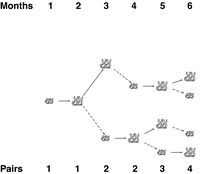

**Figure 4**. A figure illustrating the propagation of Fibonacci's rabbits if they die  
after three months (meaning that they reproduce only twice before dying).

In [4]:
Image('mortal_rabbit_tree.png', width=400)
Markdown("""**Figure 4**. A figure illustrating the propagation of Fibonacci's rabbits if they die  
after three months (meaning that they reproduce only twice before dying).""")

## Problem 

Recall the definition of the Fibonacci numbers from “Rabbits and Recurrence Relations”, which followed  
the recurrence relation $F_n$ = $F_{n−1}$ + $F_{n−2}$ and assumed that each pair of rabbits reaches  
maturity in one month and produces a single pair of offspring (one male, one female) each subsequent month.  

Our aim is to somehow modify this recurrence relation to achieve a dynamic programming solution in the  
case that all rabbits die out after a fixed number of months.  

Given: Positive integers n ≤ 100 and m ≤ 20. 

Return: The total number of pairs of rabbits that will remain after the n-th month if all rabbits live for m months. 

Sample Dataset  
6 3  
Sample Output  
4

In [108]:
sh.test_fib_pairs_mortal()

test_fib_pairs_mortal(3, 6)
Ans = 4?: True: 4
test_fib_pairs_mortal(16, 94)
Ans = 19422747110843061063?: True: 19422747110843061063


In [109]:
# %load -n sh.fib_pairs_mortal
def fib_pairs_mortal(n, m, dbg=False):
    """
    Return: total # of pairs after n months have elapsed if all rabbits live
            for m months.
            Each pair of rabbits reaches maturity in one month and produces 
            a single pair of offspring (one male, one female) each subsequent
            month.
    n :: generations in months, n ≤ 100.
    m :: lifetime in months, m ≤ 20.
    dbg :: debug flag, to print intermediate result
    """
    if (n <= 0) | (n > 100):
        return "Incorrect number of generations, n: (1-100)"
    if (m <= 0) | (m > 20):
        return "Incorrect lifespan (in months), m: (1-20)"
    
    # Rabbits born in generation i are produced by rabbits born during 
    # the previous (m-1) generation, ie. births[i] = sum(births[i-m:i-1]). 
    # The sum of births during the last m generations is the current pop since
    # all rabbits older than m are dead.
    
    Pop = [1] + [0]*(m - 1)
    if dbg:
        pops = []
        pops.append([0, sum(Pop), Pop])
    
    for i in range(1, n):
        Pop = [sum(Pop[1:])] + Pop[:-1]
        if dbg:
            pops.append([i, sum(Pop), Pop])

    if dbg:
        print(pops)
    return sum(Pop)

In [110]:
print('fib_pairs_mortal:')
n, m = 6, 3
for i in range(n):
    c = i + 1
    print(F'months: {i}, pairs: {sh.fib_pairs_mortal(c, m)}')

fib_pairs_mortal:
months: 0, pairs: 1
months: 1, pairs: 1
months: 2, pairs: 2
months: 3, pairs: 2
months: 4, pairs: 3
months: 5, pairs: 4


---
---
# GRPH :: A Brief Introduction to Graph Theory  
* Problem: http://rosalind.info/problems/grph/ 

Networks arise everywhere in the practical world, especially in biology. Networks are prevalent in popular applications such as modeling the spread  
of disease, but the extent of network applications spreads far beyond popular science. Our first question asks how to computationally model a network without  
actually needing to render a picture of the network.

First, some terminology: graph is the technical term for a network; a graph is made up of hubs called nodes (or vertices), pairs of which are connected via segments/curves  
called edges. If an edge connects nodes \$v$ and $w$, then it is denoted by $v,w$ (or equivalently $w,v$).

* an edge $v,w$ is incident to nodes $v$ and $w$; $v$ and $w$ are adjacent to each other;
* the degree of $v$ is the number of edges incident to it;
* a walk is an ordered collection of edges for which the ending node of one edge is the 
  starting node of the next (e.g., {v1,v2}, {v2,v3}, {v3,v4}, etc.);
* a path is a walk in which every node appears in at most two edges;
* path length is the number of edges in the path;
* a cycle is a path whose final node is equal to its first node (so that every node is 
  incident to exactly two edges in the cycle); and 
* the distance between two vertices is the length of the shortest path connecting them.  

Graph theory is the abstract mathematical study of graphs and their properties.

## Problem  
A graph whose nodes have all been labeled can be represented by an adjacency list, in which each  
row of the list contains the two node labels corresponding to a unique edge.

A directed graph (or digraph) is a graph containing directed edges, each of which has an orientation.  
That is, a directed edge is represented by an arrow instead of a line segment; the starting and ending  
nodes of an edge form its tail and head, respectively.  
The directed edge with tail \$v$ and head $w$ is represented by $(v,w)$ (but not by $(w,v)$).  
A directed loop is a directed edge of the form $(v,v)$.

For a collection of strings and a positive integer $k$, the _overlap graph_ for the strings is a directed  
graph $O_{k}$ in which each string is represented by a node, and string $s$ is connected to string $t$ with  
a directed edge when there is a length $k$ suffix of $s$ that matches a length $k$ prefix of $t$, as long  
as $s≠t$; we demand $s≠t$ to prevent directed loops in the overlap graph (although directed cycles may be present). 

Given: A collection of DNA strings in FASTA format having total length at most 10 kbp.  

Return: The adjacency list corresponding to $O_{3}$. You may return edges in any order.   

Sample Dataset
```
>Rosalind_0498
AAATAAA
>Rosalind_2391
AAATTTT
>Rosalind_2323
TTTTCCC
>Rosalind_0442
AAATCCC
>Rosalind_5013
GGGTGGG
```

Sample Output
```
Rosalind_0498 Rosalind_2391
Rosalind_0498 Rosalind_0442
Rosalind_2391 Rosalind_2323
```

In [102]:
sh.test_overlap_graph()

test_overlap_graph()
Ans = ['Rosalind_0498 Rosalind_2391', 'Rosalind_0498 Rosalind_0442', 'Rosalind_2391 Rosalind_2323']?: True


In [78]:
fname = DIR_DATA.joinpath('rosalind_grph.txt')
edges = sh.print_overlap_edges(sh.overlap_graph(fname))
sh.save_seqs_to_file(edges, DIR_DATA.joinpath('overlap.ans'))

---
---
# IEV :: Calculating Expected Offspring
* Problem: http://rosalind.info/problems/iev/


The Need for Averages
>[...] Researchers need to predict the expected number of antibiotic-resistant pathogenic bacteria in a future outbreak, estimate the predicted number of locations in the genome that will match a given motif, and study the distribution of alleles throughout an evolving population. In this problem, we will begin discussing the third issue; first, we need to have a better understanding of what it means to average a random process.

* Problem
For a random variable X taking integer values between 1 and n, the expected value of X is E(X) = $\sum_{k=1}^{n} k × Pr(X=k)$.  
The expected value offers us a way of taking the long-term average of a random variable over a large number of trials.

As a motivating example, let X be the number on a six-sided die. Over a large number of rolls, we should expect to obtain an average of 3.5 on the die (even though it's not possible to roll a 3.5). The formula for expected value confirms that E(X) = $\sum_{k=1}^{6} k × Pr(X=k)$ = 3.5.

More generally, a random variable for which every one of a number of equally spaced outcomes has the same probability is called a uniform random variable (in the die example, this "equal spacing" is equal to 1). We can generalize our die example to find that if X is a uniform random variable with minimum possible value a and maximum possible value b, then E(X)=a+b2. You may also wish to verify that for the dice example, if Y is the random variable associated with the outcome of a second die roll, then E(X+Y)=7.

Given: Six nonnegative integers, each of which does not exceed 20,000. The integers correspond to the number of couples in a population possessing each genotype pairing for a given factor. In order, the six given integers represent the number of couples having the following genotypes:

AA-AA
AA-Aa
AA-aa
Aa-Aa
Aa-aa
aa-aa
Return: The expected number of offspring displaying the dominant phenotype in the next generation, under the assumption that every couple has exactly two offspring.

Sample Dataset
1 0 0 1 0 1
Sample Output
3.5